In [22]:
# Setup the environment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# if using a Jupyter notebook, include:
%matplotlib inline

In [23]:
# Load data from tab file

tls_df = pd.read_table('./tlssul.tab')
tls_df.Duration = tls_df.Duration / 1e+9
tls_df.head()

,ResetId,SymbolId,OpType,Duration,Input,Output
0,0,-1,Reset,0.002484,Reset,Reset
1,0,0,TimedIO,0.101334,ClientHelloRSA,HandshakeServerHelloTLSv12HandshakeCertificate...
2,1,-1,Reset,0.001146,Reset,Reset
3,1,0,TimedIO,0.116002,ClientHelloDHE,HandshakeServerHelloTLSv12HandshakeCertificate...
4,2,-1,Reset,0.001032,Reset,Reset


In [24]:
# Concatenate IO

tls_df["IO"] = tls_df["Input"]+" / "+tls_df["Output"]
tls_df.groupby("Input").describe()["Duration"]

,count,mean,std,min,25%,50%,75%,max
Input,,,,,,,,
Alert10,26.0,0.000247,0.000401,8.840000e-07,0.000002,0.000115,0.000352,0.001967
ApplicationData,35.0,0.001026,0.002131,1.388000e-06,0.000003,0.000287,0.000590,0.009781
ApplicationDataEmpty,32.0,0.000462,0.001304,8.510000e-07,0.000003,0.000312,0.000403,0.007510
ChangeCipherSpec,36.0,0.004815,0.016892,1.369000e-06,0.000003,0.000967,0.001529,0.101065
ClientHelloDHE,36.0,0.030207,0.048921,1.036000e-06,0.000003,0.000488,0.105284,0.116002
ClientHelloRSA,105.0,0.076090,0.043714,9.130000e-07,0.100452,0.100798,0.101104,0.105271
ClientKeyExchange,36.0,0.031907,0.046639,9.700000e-07,0.000003,0.002871,0.100945,0.102152
EmptyCertificate,36.0,0.000709,0.001409,9.730000e-07,0.000002,0.000283,0.000565,0.006817
Finished,36.0,0.000559,0.000852,1.571000e-06,0.000003,0.000432,0.000817,0.004816


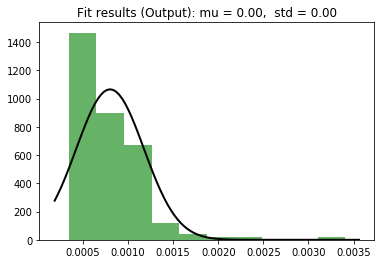

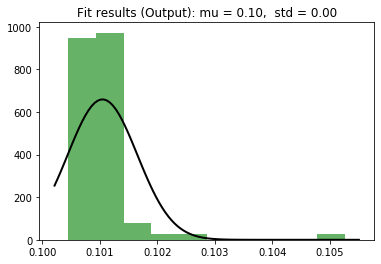

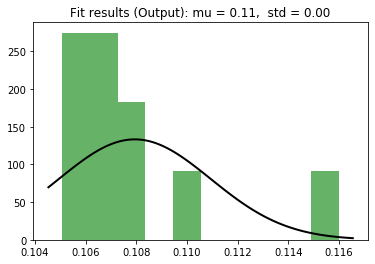

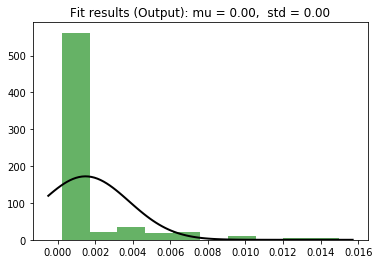

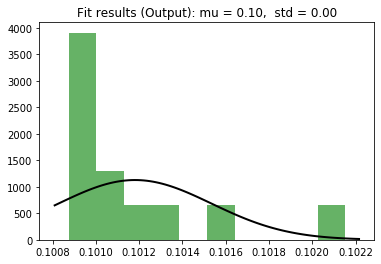

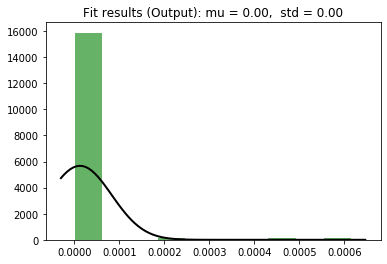

In [27]:
# Plot the duration for each label

a_label: str = "Output"
for lbl in tls_df[a_label].unique():
    data=tls_df.loc[tls_df[a_label]==lbl].Duration
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
    plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results (%s): mu = %.2f,  std = %.2f" % (a_label,mu, std)
    plt.title(title)

    plt.show()


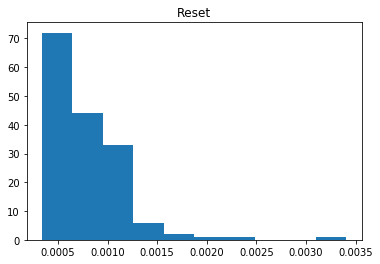

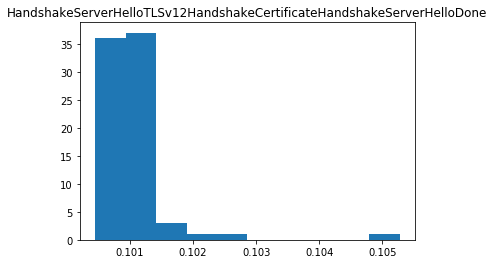

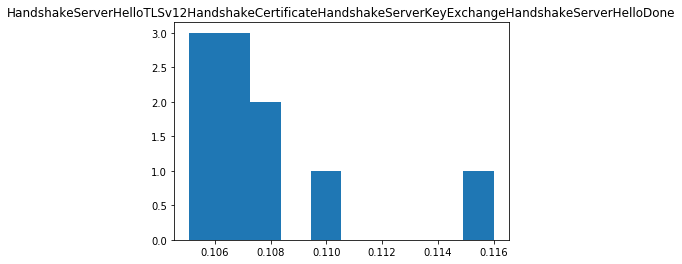

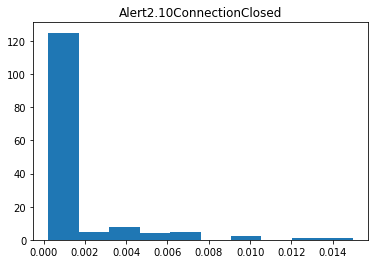

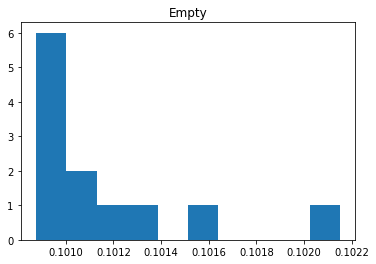

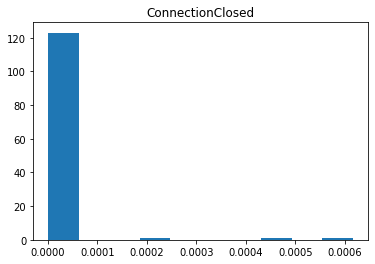